<a href="https://colab.research.google.com/github/truonghoangduy/Image-Processing-with-Python/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn

# import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Debuger 
import pdb

In [0]:
pip install yfinance

In [0]:
import yfinance as yf


# Dataset Description

In [0]:
data = yf.download("GOOG","2018-1-1","2020-6-2")


[*********************100%***********************]  1 of 1 completed


In [0]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [0]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-26,1437.270020,1441.000000,1412.130005,1417.020020,1417.020020,2060600
2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800
2020-05-28,1396.859985,1440.839966,1396.000000,1416.729980,1416.729980,1692200
2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1838100
2020-06-01,1418.390015,1437.959961,1418.390015,1431.819946,1431.819946,1217140


In [0]:
data.count()

Open         607
High         607
Low          607
Close        607
Adj Close    607
Volume       607
dtype: int64

In [0]:
data_stockOpen = data["Open"]

In [0]:
data_stockOpen.tail()

Date
2020-05-26    1437.270020
2020-05-27    1417.250000
2020-05-28    1396.859985
2020-05-29    1416.939941
2020-06-01    1418.390015
Name: Open, dtype: float64

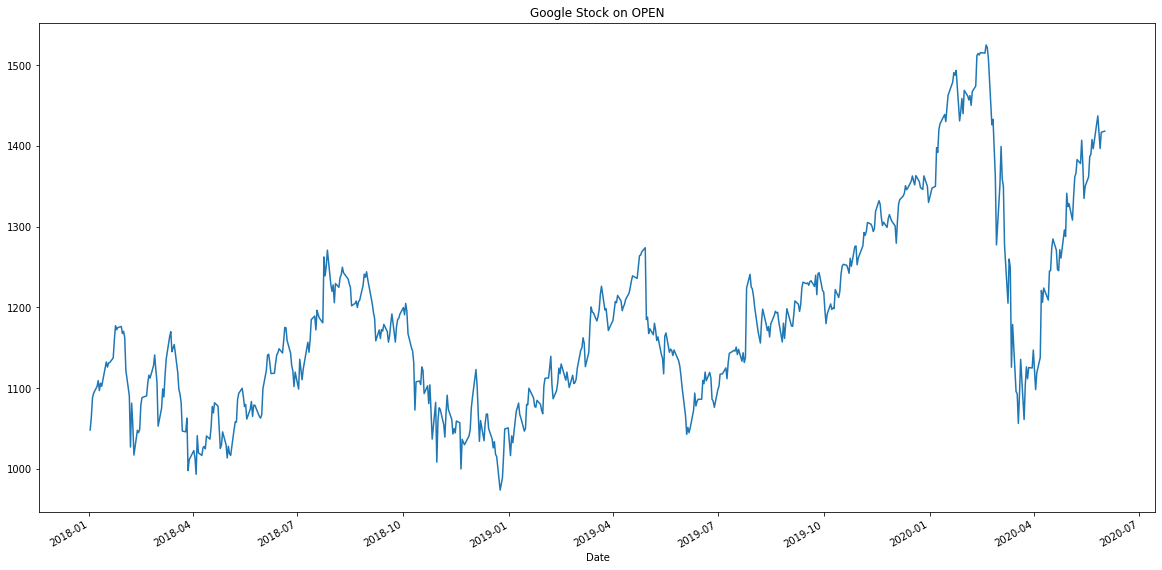

In [0]:
data_stockOpen.plot(
    title="Google Stock on OPEN",
    figsize=(20,10)
)

# Train - Test slipter

In [0]:
SLIPT_RATE = 0.1
testSlipt = round(data_stockOpen.count()*SLIPT_RATE)
# testData = data_stockOpen.tail(testSlipt)
testSet=data_stockOpen.tail(int(testSlipt))
trainSet= data_stockOpen.head(int(data_stockOpen.count()-testSlipt))
TRAIN_WINDOW = int(testSet.count())

In [0]:
print(f'Dataset Open Stock lenght : ',data_stockOpen.count())
print(f'Train Set lenght: ',trainSet.count())
print(f'Test Set lenght: ',testSet.count())

Dataset Open Stock lenght :  607
Train Set lenght:  546
Test Set lenght:  61


In [0]:
trainSet.tail()

Date
2020-02-27    1362.060059
2020-02-28    1277.500000
2020-03-02    1351.609985
2020-03-03    1399.420044
2020-03-04    1359.229980
Name: Open, dtype: float64

In [0]:
testSet.head()

Date
2020-03-05    1350.199951
2020-03-06    1277.060059
2020-03-09    1205.300049
2020-03-10    1260.000000
2020-03-11    1249.699951
Name: Open, dtype: float64

# **Neural Net Section**

In [0]:
# Neural Net
from torch.nn import LSTM,LSTMCell
from torch import optim as optimizer
from torch.nn import functional as F
# Data preprocessing
import sklearn
from sklearn.preprocessing import MinMaxScaler


In [0]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

# **Preprocessing**
transfrom the dataset to -1,1 represenation

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1)) # minize data range to -1,1 optimize perfomnce for NN

In [0]:
# data_stockOpen.values.reshape(-1,1)
#pandas.core.series.Series
train_data_normalize = scaler.fit_transform(trainSet.values.reshape(-1,1))

In [0]:
train_data_normalize
# train_data_normalize.min()

In [0]:
train_data_normalize.max()

1.0

# **Load in to Tensor**

In [0]:
# trainSet_Tensor = torch.from_numpy(train_data_normalize).view(-1) # flip back to 1 dims
trainSet_Tensor = torch.FloatTensor(train_data_normalize).view(-1) # flip back to 1 dims


In [0]:
# trainSet_Tensor.view(-1)

In [0]:
# class Model(nn.Module):
#   def __init__(self,n_feture,n_hidden_layer,):
#     super(Model, self).__init__()
#     self.n_feture = n_feture
#     self.n_hidden_layer = n_hidden_layer
#     self.lstm = nn.LSTM(input_size=,hidden_size=,)
#     self.lstmCell= nn.LSTMCell(n_feture,n_hidden_layer)
#     self.linear = nn.Linear(self.hidden_size, self.output_size)

#   def forward(self, input, future=0, y=None):
#     output=[]
#     return output


In [0]:
# opti = optimizer.Adam()

In [0]:
# rnn = nn.LSTM(10, 20, 2)

In [0]:
# a=rnn.flatten_parameters()

In [0]:
# rnn = nn.LSTM(10, 20, 2)
# input = torch.randn(5, 3, 10)
# h0 = torch.randn(2, 3, 20)
# c0 = torch.randn(2, 3, 20)
# output, (hn, cn) = rnn(input, (h0, c0))

In [0]:
# type(input)
# b =torch.tensor([2,23,5])

In [0]:
# b.size(0)


In [0]:
# b.view(-1)
# trainSet_Tensor

# **Model**

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        # ,dropout=0.2,num_layers=2
        self.lstm1 = nn.LSTM(input_size, hidden_layer_size,num_layers=2,dropout=0.2)

        # self.lstm2= nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(2,1,self.hidden_layer_size),
                            torch.zeros(2,1,self.hidden_layer_size))

    def forward(self, input_seq,future=1):
        lstm_out, self.hidden_cell = self.lstm1(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        # self.lstm2()
        # pdb.set_trace()
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        # pdb.set_trace()
        return predictions[-1]


In [0]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)  
output = m(input)  
print(output.size())

torch.Size([128, 30])


In [0]:
m

Linear(in_features=20, out_features=30, bias=True)

**Tutorial RUN**

In [0]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    # pdb.set_trace()
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1] # add-in next day for train eval()
        inout_seq.append((train_seq ,train_label)) #tuple 
    return inout_seq

In [0]:
train_inout_seq = create_inout_sequences(trainSet_Tensor, TRAIN_WINDOW)

In [0]:
a = torch.zeros(2,30)

In [0]:
a

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])

In [0]:
train_inout_seq
# [-7.2988e-01, -6.7193e-01, -5.8597e-01, -5.6420e-01, -5.3434e-01,
#         -5.0832e-01, -5.5295e-01, -5.1957e-01, -5.3368e-01, -4.2446e-01,

In [0]:
# trainSet_Tensor
# train_inout_seq[:2]
# train_inout_seq = train_inout_seq.c

In [0]:
model = LSTM().cuda()
loss_function = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

# **Training**

In [0]:
EPOCHS = 500
lostGraph= []
model.train()
for epoch in range(EPOCHS):
    correct=0;
    total =0;
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(2, 1, model.hidden_layer_size).cuda(),
                        torch.zeros(2, 1, model.hidden_layer_size).cuda())
        # dbtrain=pdb.set_trace()

        y_pred = model(seq.cuda())
        single_loss = loss_function(y_pred.cuda(), labels.cuda())
        # pdb.set_trace()
        total+=labels.size(0)
        if(y_pred.cuda() == labels.cuda()):
          # pdb.set_trace()
          correct+=1
        # pdb.set_trace()
        # correct+=(y_pred.cuda() == labels.cuda()).sum()

        single_loss.backward(retain_graph=True)
        optimizer.step()
    accurtiy = correct / total *100
    # pdb.set_trace()

    lostGraph.append(single_loss.item())
    print(f'Epoch: {epoch+1}/{EPOCHS} loss: {single_loss.item():10.8f}')

# print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [0]:
# models = model.modules
# lostGraph
arrayy = np.array(
        [
        [-0.0547],#0
        [-0.0592],#1
        [-0.0597],
        [-0.0594],
        [-0.0586],
        [-0.0577],
        [-0.0579],
        [-0.0574],
        [-0.0573],
        [-0.0555],
        [-0.0551],
        [-0.0546]
        ])

In [0]:
arr = arrayy.flatten()

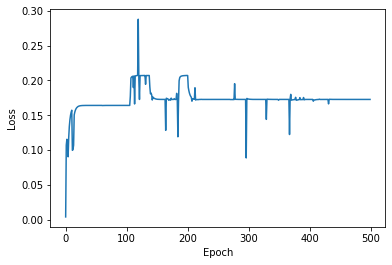

In [347]:
title = "Loss"
plt.title=title
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(lostGraph)


## **Prediction**

In [348]:
fut_pred = 1
test_inputs = trainSet_Tensor[-TRAIN_WINDOW:].tolist()
print(test_inputs)

[0.2849031090736389, 0.3046427369117737, 0.3213348686695099, 0.33388981223106384, 0.36778125166893005, 0.35000079870224, 0.3572944104671478, 0.3883194923400879, 0.4115065932273865, 0.3886822760105133, 0.37133723497390747, 0.41317564249038696, 0.38603344559669495, 0.35929033160209656, 0.35083577036857605, 0.4118693768978119, 0.3647333085536957, 0.29255950450897217, 0.33407142758369446, 0.356967955827713, 0.3647333085536957, 0.5386903285980225, 0.5174265503883362, 0.6208065748214722, 0.6461712121963501, 0.6772685050964355, 0.6877190470695496, 0.6557868123054504, 0.7183082699775696, 0.7744437456130981, 0.8332639336585999, 0.8763722777366638, 0.8641800880432129, 0.885770320892334, 0.6586535573005676, 0.7021973133087158, 0.7595300674438477, 0.6911661028862, 0.7961792945861816, 0.771141529083252, 0.7532521486282349, 0.7726657390594482, 0.7287951111793518, 0.7903735637664795, 0.8158462643623352, 0.9518845677375793, 0.9615727663040161, 0.9550773501396179, 0.9656368494033813, 0.9634597301483154

In [349]:
# trainSet_Tensor.size()
TRAIN_WINDOW


61

In [0]:
fut_prediction = 1
model.eval()
for i in range(fut_prediction):
    seq = torch.FloatTensor(test_inputs[-TRAIN_WINDOW:]).cuda()
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).cuda(),
                        torch.zeros(1, 1, model.hidden_layer_size).cuda())
        test_inputs.append(model(seq).item())

In [351]:
len(test_inputs)
TRAIN_WINDOW
# test_inputs

61

In [0]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[-TRAIN_WINDOW:] ).reshape(-1, 1))
print(actual_predictions)

In [353]:
actual_predictions.shape

(61, 1)

In [0]:
# type(data_stockOpen[-TRAIN_WINDOW:].index.copy()

In [0]:

data_stockOpen_Predictiom=pd.Series(actual_predictions.flatten(),index=data_stockOpen[-TRAIN_WINDOW:].index.copy())

In [356]:
data_stockOpen_Predictiom

Date
2020-03-05    1333.439942
2020-03-06    1338.040043
2020-03-09    1341.499996
2020-03-10    1350.839967
2020-03-11    1345.939942
                 ...     
2020-05-26    1277.499999
2020-05-27    1351.609984
2020-05-28    1399.420049
2020-05-29    1359.229981
2020-06-01    1471.494305
Length: 61, dtype: float64

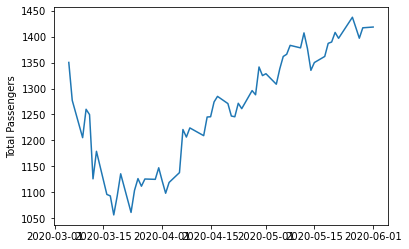

In [357]:
# x = np.arange(1, 16, 1)
plt.title="Prediction"
plt.ylabel('Total Passengers')
# plt.grid(True)
# plt.autoscale(axis='x', tight=True)
# plt.figure()
plt.plot(data_stockOpen[-TRAIN_WINDOW:])

# plt.plot(data_stockOpen_Predictiom)
plt.show()
# plt.plot("help")

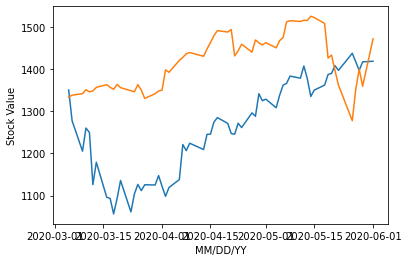

In [358]:
# x = np.arange(1, 16, 1)
plt.title="Prediction"
plt.ylabel('Stock Value')
plt.xlabel('MM/DD/YY')
# plt.grid(True)
# plt.autoscale(axis='x', tight=True)
# plt.figure()
plt.plot(data_stockOpen[-TRAIN_WINDOW:])

plt.plot(data_stockOpen_Predictiom)
plt.show()
# plt.plot("help")